In [16]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
survey_df = pd.read_csv('E:\\JESIN\\DOCUMENTS\\scma\\A4\\Survey.csv')

# Select columns of interest for clustering
sur_int = survey_df.iloc[:, 17:46]

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

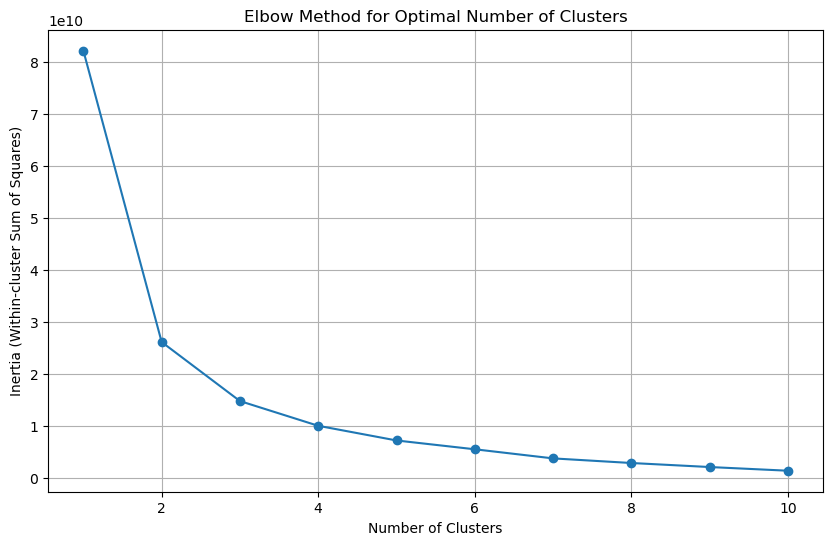

In [18]:
# Determine Optimal Number of Clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=25)
    kmeans.fit(sur_int)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [19]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=123, n_init=25)
km_res = kmeans.fit(sur_int)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


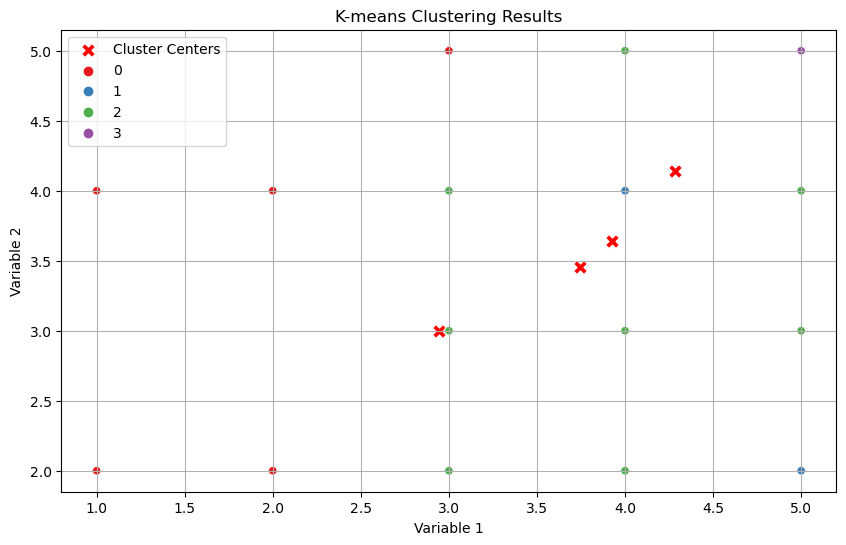

In [20]:
# Visualizing k-means Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=km_res.cluster_centers_[:, 0], y=km_res.cluster_centers_[:, 1], color='red', marker='X', s=100, label='Cluster Centers')
sns.scatterplot(x=sur_int.iloc[:, 0], y=sur_int.iloc[:, 1], hue=km_res.labels_, palette='Set1', legend='full')
plt.title('K-means Clustering Results')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.grid(True)
plt.legend()
plt.show()

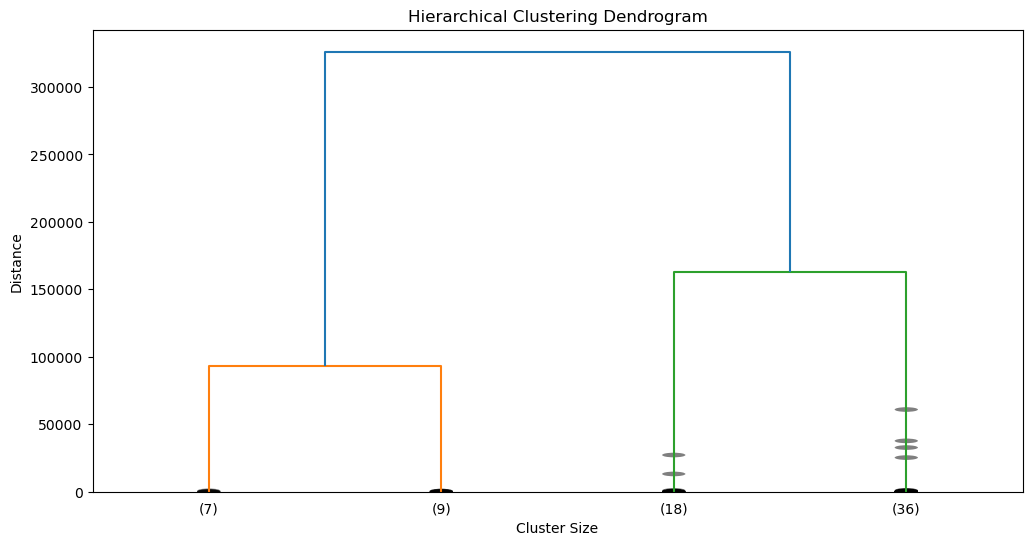

In [21]:
# Perform Hierarchical Clustering (Ward's method)
Z = linkage(sur_int, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, p=4, truncate_mode='lastp', orientation='top', leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


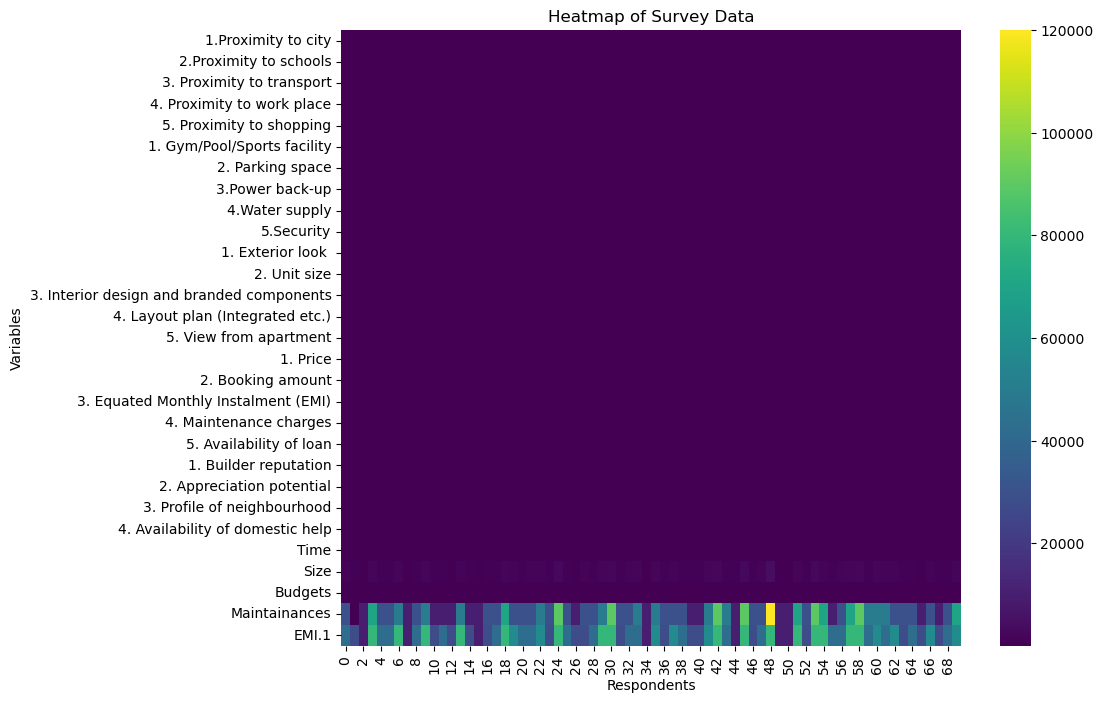

In [22]:
# Heatmap of clustered data
plt.figure(figsize=(10, 8))
sns.heatmap(sur_int.T, cmap='viridis', cbar=True)
plt.title('Heatmap of Survey Data')
plt.xlabel('Respondents')
plt.ylabel('Variables')
plt.show()
